<a href="https://colab.research.google.com/github/prodramp/DeepWorks/blob/main/DL-SatelliteImagery/Satellite_Imagery_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
import cv2
from PIL import Image 
import numpy as np 
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [7]:
minmaxscaler = MinMaxScaler()

In [8]:
dataset_root_folder = './dataset_tut/'
dataset_name = 'Dubai_Dataset'

In [9]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks': # 'images
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')): # '.jpg
        #print(image_name)
        a = True

./dataset_tut/Dubai_Dataset/Tile 1/masks
./dataset_tut/Dubai_Dataset/Tile 3/masks
./dataset_tut/Dubai_Dataset/Tile 4/masks
./dataset_tut/Dubai_Dataset/Tile 5/masks
./dataset_tut/Dubai_Dataset/Tile 7/masks
./dataset_tut/Dubai_Dataset/Tile 8/masks
./dataset_tut/Dubai_Dataset/Tile 2/masks
./dataset_tut/Dubai_Dataset/Tile 6/masks


In [10]:
image_patch_size = 256

In [11]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [12]:
image.shape

(544, 509, 3)

In [13]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [14]:
len(image_patches)

2

In [15]:
print(image_patches.shape)

(2, 1, 1, 256, 256, 3)


In [16]:
minmaxscaler = MinMaxScaler()

In [17]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [18]:
image_y[0].shape

(256, 256, 3)

In [19]:
print(type(image))

<class 'numpy.ndarray'>


In [20]:
type(Image.fromarray(image))

PIL.Image.Image

In [21]:
image.shape

(544, 509, 3)

In [22]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [23]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,10):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


In [24]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [25]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [26]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [27]:
type(image_dataset[0])

numpy.ndarray

In [28]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


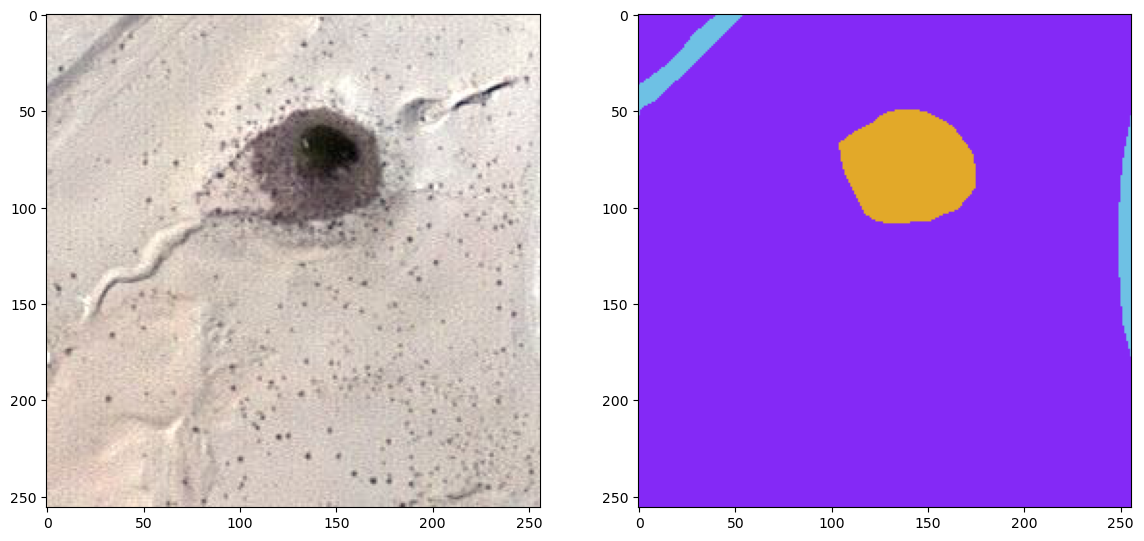

In [29]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [30]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [31]:
mask_dataset.shape

(945, 256, 256, 3)

In [32]:
label = individual_patched_mask

In [33]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [34]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [35]:
print(len(labels))

945


In [36]:
labels = np.array(labels)

In [37]:
labels[3]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [38]:
labels = np.expand_dims(labels, axis=3)

In [39]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [40]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [41]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


In [42]:
labels.shape

(945, 256, 256, 1)

In [43]:
mask_dataset.shape

(945, 256, 256, 3)

In [44]:
image_dataset.shape

(945, 256, 256, 3)

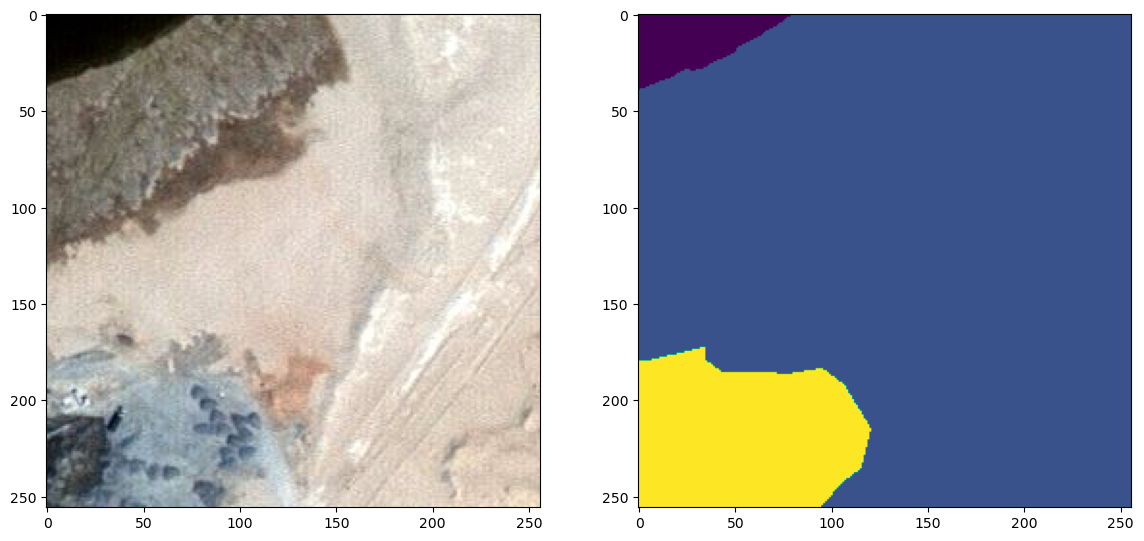

In [45]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [46]:
labels[0][:,:,0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [47]:
total_classes = len(np.unique(labels))

In [48]:
total_classes

6

In [49]:
from tensorflow.keras.utils import to_categorical 

2023-06-20 23:31:18.499260: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2023-06-20 23:31:19.444626: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [50]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [51]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [52]:
master_trianing_dataset = image_dataset

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [56]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [57]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


# Deep learning part

In [58]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda
     

In [59]:
from keras import backend as K


In [60]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value


In [61]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [62]:
metrics = ["accuracy", jaccard_coef]


In [63]:

print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [64]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes, 
                          image_height=image_height, 
                          image_width=image_width, 
                          image_channels=image_channels)

In [65]:
model = get_deep_learning_model()


In [66]:
# Uncomment below to see the model architecture
# model.get_config()

# Generating Loss function

In [67]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]


In [68]:
#import segmentation_models as sm


In [69]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm


Segmentation Models: using `tf.keras` framework.


In [84]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)


In [85]:
focal_loss = sm.losses.CategoricalFocalLoss()


In [86]:
'''dice_loss = sm.losses.DiceLoss(class_weights = weights)
dice_loss = sm.losses.DiceLoss(class_weights = weights)
total_loss = dice_loss + (1 * focal_loss)'''


'dice_loss = sm.losses.DiceLoss(class_weights = weights)\ndice_loss = sm.losses.DiceLoss(class_weights = weights)\ntotal_loss = dice_loss + (1 * focal_loss)'

In [87]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)


In [88]:
total_loss = dice_loss + (1 * focal_loss)


In [4]:
import tensorflow as tf


In [5]:
tf.keras.backend.clear_session()


In [91]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)


In [92]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [93]:
# To visualize the model
from keras.utils.vis_utils import plot_model

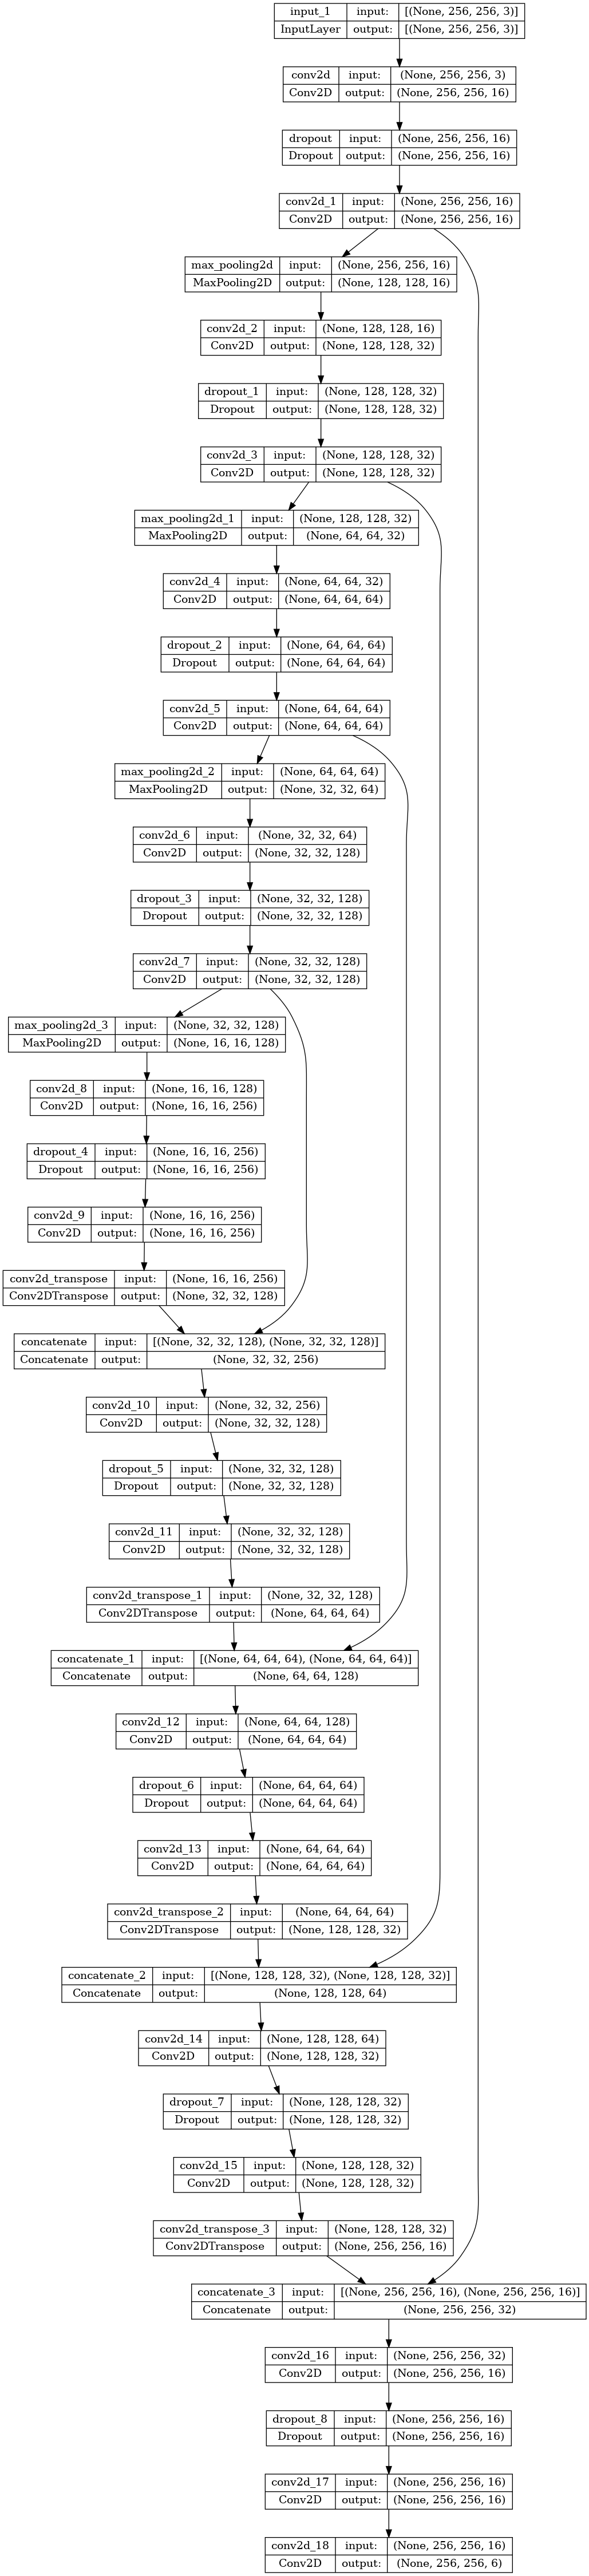

In [94]:
plot_model(model, to_file='satellite_model_plot.png', show_shapes=True, show_layer_names=True)

In [2]:
import keras
from IPython.display import clear_output
%matplotlib inline

In [96]:
class PlotLoss(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.jaccard_coef = []
        self.val_jaccard_coef = []
        self.fig = plt.figure()
        self.logs = []
    
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        #self.losses.append(logs.get("loss"))
        #self.val_losses.append(logs.get("val_loss"))

        self.jaccard_coef.append(logs.get("jaccard_coef"))
        self.val_jaccard_coef.append(logs.get("val_jaccard_coef"))

        self.i += 1

        clear_output(wait=True)
        #plt.plot(self.x, self.losses, label="loss")
        #plt.plot(self.x, self.val_losses, label="val_loss")

        plt.plot(self.x, self.jaccard_coef, label="jaccard_coef")
        plt.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")

        plt.legend()
        plt.show();
    
plot_loss = PlotLoss()

In [97]:
# To get two plots
class PlotLossEx(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.jaccard_coef = []
        self.val_jaccard_coef = []
        self.fig = plt.figure()
        self.logs = []
    
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get("loss"))
        self.val_losses.append(logs.get("val_loss"))

        self.jaccard_coef.append(logs.get("jaccard_coef"))
        self.val_jaccard_coef.append(logs.get("val_jaccard_coef"))

        self.i += 1

        plt.figure(figsize=(14, 8))
        f, (graph1, graph2) = plt.subplots(1, 2, sharex=True)

        clear_output(wait=True)
        
        graph1.set_yscale('log')
        graph1.plot(self.x, self.losses, label="loss")
        graph1.plot(self.x, self.val_losses, label="val_loss")
        graph1.legend()

        graph2.set_yscale('log')
        graph2.plot(self.x, self.jaccard_coef, label="jaccard_coef")
        graph2.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")

        graph2.legend()
        plt.show();
    
plot_loss = PlotLossEx()

In [ ]:

#Two graph
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=10,
                          validation_data=(X_test, y_test),
                          callbacks=[plot_loss],
                          shuffle=False)

Epoch 1/10


2023-06-16 16:19:36.413302: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 631504896 exceeds 10% of free system memory.
2023-06-16 16:19:37.058309: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1263009792 exceeds 10% of free system memory.


10/51 [====>.........................] - ETA: 1:50 - loss: 1.0255 - accuracy: 0.4058 - jaccard_coef: 0.1588

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

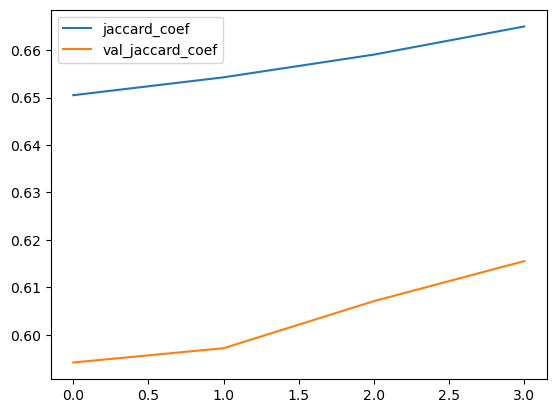

51/51 [==============================] - 132s 3s/step - loss: 0.9193 - accuracy: 0.8366 - jaccard_coef: 0.6650 - val_loss: 0.9359 - val_accuracy: 0.7932 - val_jaccard_coef: 0.6155
Epoch 5/10
32/51 [=================>............] - ETA: 48s - loss: 0.9194 - accuracy: 0.8370 - jaccard_coef: 0.6624

KeyboardInterrupt: 

In [ ]:

#One graph
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=10,
                          validation_data=(X_test, y_test),
                          callbacks=[plot_loss],
                          shuffle=False)

In [ ]:
history_a = model_history


NameError: name 'model_history' is not defined

In [ ]:
history_a.history

NameError: name 'history_a' is not defined

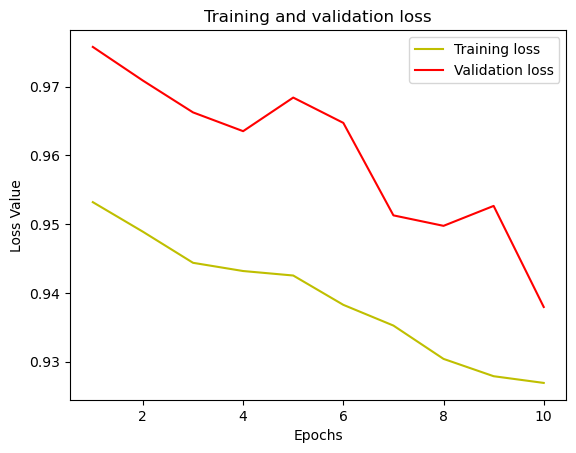

In [ ]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')   
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()


In [ ]:
loss

[0.9531990885734558,
 0.9489003419876099,
 0.9443826675415039,
 0.9431869983673096,
 0.9425345063209534,
 0.9382712841033936,
 0.9352569580078125,
 0.930413544178009,
 0.9278956651687622,
 0.9269206523895264]

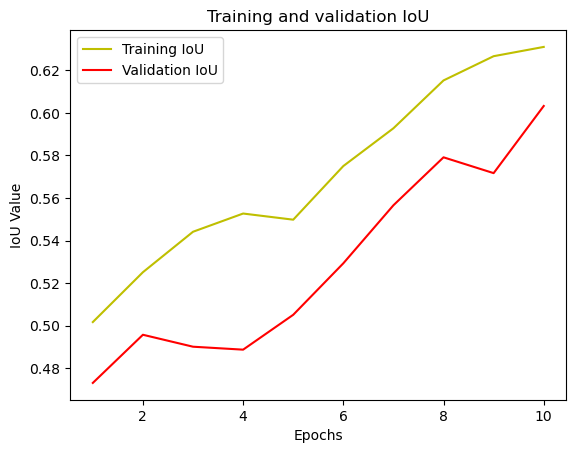

In [ ]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']
epochs = range(1, len(jaccard_coef) + 1)

plt.plot(epochs, jaccard_coef, 'y', label='Training IoU')
plt.plot(epochs, val_jaccard_coef, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU Value')
plt.legend()
plt.show()


In [ ]:
model_history.params

{'verbose': 1, 'epochs': 10, 'steps': 51}

In [ ]:
y_pred = model.predict(X_test)

5/5 [==============================] - 4s 730ms/step


In [ ]:
len(y_pred)

142

In [ ]:
y_pred.shape

(142, 256, 256, 6)

In [ ]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [ ]:
len(y_pred_argmax)

142

In [ ]:
y_pred_argmax

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [4, 4, 4, ..., 2, 2, 2],
        [4, 4, 4, ..., 2, 2, 2],
        [4, 4, 4, ..., 2, 2, 2]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 4, 4, 1],
        [1, 1, 1, ..., 4, 1, 1],
        [1, 1, 1, ..., 4, 4, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_test_argmax = np.argmax(y_test, axis=3)

In [ ]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

# Comparing prediction results

##### using test images, using mask images and predicted result images

In [ ]:
test_image_number = random.randint(0, len(X_test)-1)

test_image = X_test[test_image_number]
groud_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, axis=0)

prediction = (model.predict(test_image_input))
predicted_image = np.argmax(prediction, axis=-1)
predicted_image = predicted_image[0,:,:]


1/1 [==============================] - 0s 52ms/step


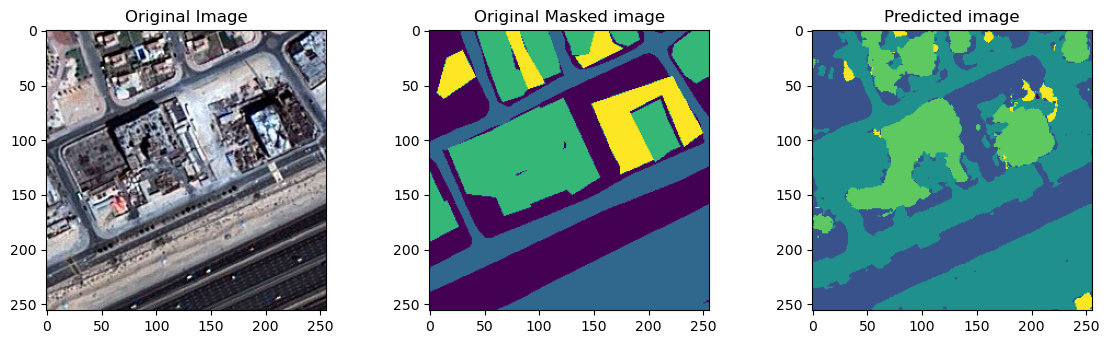

In [ ]:
# Put all the 3 images together and display
plt.figure(figsize=(14, 8))
plt.subplot(231)
plt.title('Original Image')
plt.imshow(test_image)
plt.subplot(232)
plt.title('Original Masked image')
plt.imshow(groud_truth_image)
plt.subplot(233)
plt.title('Predicted image')
plt.imshow(predicted_image)

In [ ]:
model.save('./saved_model/satellite_image_segmentation.h5')

In [6]:
import keras.backend as K
import segmentation_models as sm

def dice_loss_plus_1focal_loss(y_true, y_pred):
    # Compute dice loss using the DiceLoss class from segmentation_models
    dice_loss = sm.losses.DiceLoss(class_weights=weights)(y_true, y_pred)

    # Compute focal loss using the CategoricalFocalLoss class from segmentation_models
    focal_loss = sm.losses.CategoricalFocalLoss()(y_true, y_pred)

    # Combine the dice loss and focal loss
    total_loss = dice_loss + (1 * focal_loss)

    return total_loss


AttributeError: module 'keras.utils.generic_utils' has no attribute 'get_custom_objects'

In [99]:
import keras
from keras import models

# Register the custom loss function
keras.losses.dice_loss_plus_1focal_loss = dice_loss_plus_1focal_loss
keras.metrics.jaccard_coef = jaccard_coef
# Load the saved model
model = models.load_model('./saved_model/satellite_image_segmentation.h5')


In [ ]:
# load the saved model

from keras import models

model = models.load_model('./saved_model/satellite_image_segmentation.h5')


ValueError: Unknown loss function: 'dice_loss_plus_1focal_loss'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [ ]:
ls -lah

total 3.4M
drwxrwx---  8 luser luser 4.0K Jun 10 22:22  ./
drwxr-x--- 33 luser luser 4.0K Jun 10 14:55  ../
-rw-rw----  1 luser luser  111 Jun 10 11:59 '='
-rw-rw----  1 luser luser 2.2K May 18 18:14  data_loading.py
-rw-rw----  1 luser luser 2.0K May 18 17:57  data_saving.py
drwxrwx---  4 luser luser 4.0K May 18 17:16  dataset/
drwxrwx---  3 luser luser 4.0K May 24 18:27  dataset_tut/
-rw-rw----  1 luser luser  23K Jun  9 11:24  functions.py
drwxrwx---  8 luser luser 4.0K Jun  9 11:58  .git/
-rw-rw----  1 luser luser  667 May 24 23:00  important_code.txt
-rw-rw----  1 luser luser  19K Jun 10 22:22  model_architecture.json
-rw-rw----  1 luser luser  630 Jun  9 11:43  README.md
-rw-rw----  1 luser luser 1.1M Jun 10 14:45  Satellite_Imagery_DeepLearning-Base.ipynb
-rw-rw----  1 luser luser 1.4M Jun 11 12:08  Satellite_Imagery_Segmentation.ipynb
-rw-rw----  1 luser luser   84 May 24 19:53  satellite_imagery_segmentation.py
drwxrwx---  2 luser luser 4.0K Jun 11 12:04  saved_model/
drwxrwx-